In [223]:
import pandas as pd
import re

In [224]:
df= pd.read_csv('sentence_data_8.csv')

# Preprocessing

1) Drop all Nan row

In [225]:
#drop all Nan
df.dropna(inplace= True)
df

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,Personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,The room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,The shower was great Lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,The room was small and the bathroom was minute
...,...,...,...,...
968664,el Besòs i el Maresme,Spain,Reception area very shabby Walls in bedroom w...,Walls in bedroom were so thin you could hear e...
968665,Vienna,Austria,I was informed when I checked in that I would...,I was informed when I checked in that I would ...
968666,Amsterdam,Netherlands,Could hear other people shutting doors but di...,Could hear other people shutting doors but did...
968667,Vienna,Austria,Hotel is showing signs of wear Room furniture...,Room furniture was worn and shabby bed amazing...


In [226]:
samples=df.copy(deep=True)
sample=samples[:50000]
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,Have stayed before I e 9yrs ago shop no longer...
1,Vienna,Austria,Breakfast options are limited Personally i wo...,Personally i would choose a hotel closer to an...
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,The room was a great size for a city hotel
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,The shower was great Lovely old building with ...
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,The room was small and the bathroom was minute
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,t self serve but it isn t a big deal
49996,Vienna,Austria,Construction across the road not the hotels f...,I would stay here again if i went back to Vienna
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,The rooms we booked three were all very small ...
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,All three rooms had a very strong smell of mould


2) Removing stopwords and splitting into corpus

In [227]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

from nltk.corpus import stopwords
stop_list = stopwords.words('english')
stop_list += ['hotel', 'however', 'could', 'get', 'back', 'bit', 'one', 'know', 'i', 'have', 'would', 'take', 'a', 'choose', 'the', 'first', 'second', 'lovely', 'will', 'definitely', 'longer', 'stayed', 'also']
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [228]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [word.lower() for word in x.split() if word.lower() not in stop_list])

C:\Users\Yujin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Lemmatization

In [230]:
sample['sent_list']= sample['sent_list'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x if lemmatizer.lemmatize(word.lower()) not in stop_list])

C:\Users\Yujin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
sample

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[e, 9yrs, ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway, s..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old, building, character, perf..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self, serve, big, deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[room, booked, three, small, particular, downr..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, room, strong, smell, mould]"


In [232]:
# sample['sent_list'] = sample['sent_list'].apply(lambda x: [gensim.models.phrases.Phrases(x, min_count=3, threshold=10)])

doc = sample['sent_list'].values.tolist()
bi = gensim.models.phrases.Phrases(doc, min_count=3, threshold=10)
tri = gensim.models.phrases.Phrases(bi[doc], min_count=3, threshold=10)
sample['sent_list'] = tri[bi[doc]]

C:\Users\Yujin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [233]:
df_lem=sample.copy()

In [234]:
df_lem

,city,country,Review,sent_list
0,Vienna,Austria,Location was good Have stayed before I e 9yrs...,"[e, 9yrs, ago, shop, bar, changed, still, nice]"
1,Vienna,Austria,Breakfast options are limited Personally i wo...,"[personally, closer, another, safer, subway_st..."
2,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[room, great, size, city]"
3,City of London,United Kingdom,The room was a great size for a city hotel Th...,"[shower, great, old_building, character, perfe..."
4,West End of London,United Kingdom,The room was small and the bathroom was minut...,"[room, small, bathroom, minute]"
...,...,...,...,...
49995,Vienna,Austria,Construction across the road not the hotels f...,"[self_serve, big_deal]"
49996,Vienna,Austria,Construction across the road not the hotels f...,"[stay, went, vienna]"
49997,West End of London,United Kingdom,The rooms we booked three were all very small...,"[room, booked, three, small, particular, downr..."
49998,West End of London,United Kingdom,The rooms we booked three were all very small...,"[three, room, strong_smell, mould]"


# 4.1) Create dictionary

In [235]:
import gensim 
from gensim import corpora

<b> 4.1.1) Create list from dataframe <b>

In [236]:
#df2 lemmatise only
doc_lem= df_lem['sent_list'].values.tolist()

<b> 4.1.2) Create dictionary <b>

In [237]:
dict_lem=corpora.Dictionary(doc_lem)

In [238]:
token_to_id2=dict_lem.token2id
print(type(token_to_id2))
print(token_to_id2)

<class 'dict'>
{'9yrs': 0, 'ago': 1, 'bar': 2, 'changed': 3, 'e': 4, 'nice': 5, 'shop': 6, 'still': 7, 'another': 8, 'city': 9, 'closer': 10, 'knew': 11, 'personally': 12, 'safer': 13, 'staying': 14, 'subway_station': 15, 'great': 16, 'room': 17, 'size': 18, 'character': 19, 'efficient': 20, 'felt_like': 21, 'free': 22, 'happens': 23, 'helpful': 24, 'morning': 25, 'old_building': 26, 'perfect': 27, 'shower': 28, 'snack': 29, 'spot': 30, 'staff': 31, 'superb': 32, 'tea_coffee': 33, 'weekday': 34, 'bathroom': 35, 'minute': 36, 'small': 37, 'bedside_lamp': 38, 'ceiling': 39, 'easier': 40, 'eye': 41, 'spotlight': 42, 'air': 43, 'coming': 44, 'low_level': 45, 'noise_outside': 46, 'probably': 47, 'conditioning_unit': 48, 'earplug': 49, 'light_sleeper': 50, 'price': 51, 'small_side': 52, 'aircon': 53, 'broken': 54, 'inside': 55, 'noisy': 56, 'traffic': 57, 'work': 58, 'dining': 59, 'evening': 60, 'festivity': 61, 'little': 62, 'weekend': 63, 'location': 64, 'made': 65, 'empty': 66, 'lunch': 6

<b> 4.1.3) TF <b>

In [239]:
vec_lem= [dict_lem.doc2bow(doc) for doc in doc_lem]

# Train the LDA model with Gensim

In [240]:
import gensim

<b>1) LDA with term freq (tf)<b>

In [241]:
lda_reviews_lem= gensim.models.ldamodel.LdaModel(corpus=vec_lem, id2word=dict_lem, num_topics=10)

In [242]:
topics_lem=lda_reviews_lem.show_topics(10,15)

for i in range(0,10):
    print(topics_lem[i])

(0, '0.159*"room" + 0.037*"small" + 0.034*"bathroom" + 0.021*"bed" + 0.021*"shower" + 0.020*"clean" + 0.014*"comfortable" + 0.010*"nice" + 0.010*"window" + 0.010*"view" + 0.009*"big" + 0.009*"large" + 0.009*"noisy" + 0.009*"quite" + 0.009*"night"')
(1, '0.053*"room" + 0.024*"check" + 0.017*"booking" + 0.012*"family" + 0.012*"lobby" + 0.011*"getting" + 0.011*"cold" + 0.010*"slow" + 0.010*"made" + 0.009*"morning" + 0.009*"working" + 0.009*"request" + 0.009*"hot" + 0.008*"even_though" + 0.008*"checking"')
(2, '0.050*"room" + 0.036*"u" + 0.027*"reception" + 0.016*"asked" + 0.015*"staff" + 0.012*"problem" + 0.009*"another" + 0.008*"help" + 0.008*"provided" + 0.008*"told" + 0.008*"day" + 0.008*"dirty" + 0.008*"two" + 0.007*"receptionist" + 0.007*"2"')
(3, '0.070*"breakfast" + 0.050*"good" + 0.018*"room" + 0.015*"service" + 0.013*"want" + 0.013*"quality" + 0.013*"standard" + 0.011*"go" + 0.011*"choice" + 0.011*"need" + 0.011*"poor" + 0.010*"bad" + 0.009*"coffee" + 0.009*"better" + 0.009*"stay

# Choosing Optimal Number of the Topics

<b>1) Model with tf vectors - DONT RUN THIS<b>

In [243]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 14, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    lda_reviews_lem= gensim.models.ldamodel.LdaModel(corpus=vec_lem, id2word=dict_lem, num_topics=num_topics, iterations=1000, random_state=100)
    coherencemodel = CoherenceModel(model=lda_reviews_lem, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_reviews_lem)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-03-30 14:06:10.092936
#Topics: 2 Score: 0.20994163019413517
#Topics: 4 Score: 0.2634569331358979
#Topics: 6 Score: 0.2830427702057683
#Topics: 8 Score: 0.31541449434481367
#Topics: 10 Score: 0.30469723801962023
#Topics: 12 Score: 0.32121401488198226
2020-03-30 14:08:25.000044


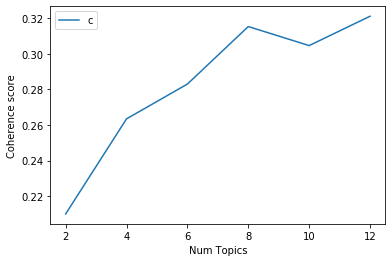

In [244]:
# Show graph

import matplotlib.pyplot as plt

limit=14; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [245]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2099
Num Topics = 4  has Coherence Value of 0.2635
Num Topics = 6  has Coherence Value of 0.283
Num Topics = 8  has Coherence Value of 0.3154
Num Topics = 10  has Coherence Value of 0.3047
Num Topics = 12  has Coherence Value of 0.3212


# <b>- END HERE BECAUSE RESULT ARE NOT GOOD-<b>

# Coherence Score - dont think need this

In [246]:
from gensim.models import CoherenceModel

In [247]:
# Compute Coherence score for lemmatising -tf only
coherence_model_lda_lem = CoherenceModel(model=lda_reviews_lem, texts=doc_lem, dictionary=dict_lem, coherence='c_v')
coherence_lda_lem = coherence_model_lda_lem.get_coherence()
print('\nCoherence Score LDA-lem: ', coherence_lda_lem)



Coherence Score LDA-lem:  0.32121401488198226


In [249]:
from pprint import pprint
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.070*"location" + 0.055*"staff" + 0.052*"room" + 0.044*"great" + '
  '0.038*"good" + 0.030*"nice" + 0.026*"clean" + 0.019*"excellent" + '
  '0.017*"friendly" + 0.015*"breakfast"'),
 (1,
  '0.061*"breakfast" + 0.028*"staff" + 0.026*"good" + 0.023*"restaurant" + '
  '0.022*"stay" + 0.020*"food" + 0.017*"great" + 0.015*"excellent" + '
  '0.014*"service" + 0.012*"location"'),
 (2,
  '0.120*"room" + 0.034*"small" + 0.021*"bathroom" + 0.016*"night" + 0.012*"2" '
  '+ 0.011*"bed" + 0.010*"window" + 0.010*"noisy" + 0.009*"work" + '
  '0.008*"noise"'),
 (3,
  '0.083*"room" + 0.019*"bed" + 0.013*"like" + 0.011*"really" + '
  '0.010*"spacious" + 0.009*"much" + 0.008*"coffee" + 0.007*"view" + '
  '0.007*"even_though" + 0.007*"night"'),
 (4,
  '0.012*"breakfast" + 0.011*"pool" + 0.010*"around" + 0.009*"good" + '
  '0.009*"walking_distance" + 0.009*"building" + 0.008*"travel" + '
  '0.008*"offer" + 0.007*"arrived" + 0.007*"visit"'),
 (5,
  '0.073*"staff" + 0.020*"friendly" + 0.019*"receptio

# Most Dominant Topic for each Document

In [255]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=vec_lem, data=doc_lem)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(100)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6458,"room, bed, like, really, spacious, much, coffe...","[e, 9yrs, ago, shop, bar, changed, still, nice]"
1,1,6.0,0.3332,"room, u, check, problem, guest, two, asked, to...","[personally, closer, another, safer, subway_st..."
2,2,0.0,0.4880,"location, staff, room, great, good, nice, clea...","[room, great, size, city]"
3,3,0.0,0.4364,"location, staff, room, great, good, nice, clea...","[shower, great, old_building, character, perfe..."
4,4,2.0,0.6227,"room, small, bathroom, night, 2, bed, window, ...","[room, small, bathroom, minute]"
...,...,...,...,...,...
95,95,0.0,0.8540,"location, staff, room, great, good, nice, clea...","[bed, brilliant, shower, room, great]"
96,96,2.0,0.6166,"room, small, bathroom, night, 2, bed, window, ...","[ok, debit, room, price, plus, 100, eur, keep,..."
97,97,5.0,0.4800,"staff, friendly, reception, room, helpful, bar...","[need, money, cash, flow, pls, go, bank]"
98,98,2.0,0.6398,"room, small, bathroom, night, 2, bed, window, ...","[always, friendly, keen, chat, extremely_helpf..."


# Save Model

In [258]:
#Save a model to disk, or reload a pre-trained model
import pickle

# lda_lem_tfidf.save("lda")

ldapickle = open('ldapickle', "wb")
pickle.dump(optimal_model, ldapickle)
ldapickle.close()

In [279]:
import pickle
reader = open("ldamallet_model478927.pickle", "rb")
tester_model = pickle.load(reader)
topics_lem=tester_model.show_topics(10,15)
topics_lem

[(12,
  '0.216*"breakfast" + 0.111*"good" + 0.048*"food" + 0.034*"service" + 0.033*"restaurant" + 0.025*"choice" + 0.020*"excellent" + 0.017*"quality" + 0.016*"nice" + 0.015*"buffet" + 0.015*"option" + 0.014*"poor" + 0.012*"selection" + 0.011*"english" + 0.011*"fresh"'),
 (13,
  '0.118*"location" + 0.063*"great" + 0.045*"good" + 0.030*"perfect" + 0.027*"place" + 0.024*"walking" + 0.023*"restaurant" + 0.023*"excellent" + 0.021*"distance" + 0.020*"london" + 0.016*"close" + 0.014*"city" + 0.013*"easy" + 0.013*"nearby" + 0.012*"shop"'),
 (8,
  '0.174*"room" + 0.100*"clean" + 0.092*"comfortable" + 0.068*"bed" + 0.061*"nice" + 0.037*"good" + 0.029*"modern" + 0.026*"quiet" + 0.022*"spacious" + 0.020*"comfy" + 0.019*"big" + 0.017*"bathroom" + 0.013*"size" + 0.012*"decor" + 0.010*"beautiful"'),
 (3,
  '0.061*"room" + 0.049*"coffee" + 0.047*"free" + 0.033*"tea" + 0.030*"water" + 0.024*"facility" + 0.023*"wifi" + 0.021*"day" + 0.021*"drink" + 0.015*"extra" + 0.015*"parking" + 0.013*"bar" + 0.013*

In [272]:
# TEST NEW DATA
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim import corpora
import pickle

lemmatizer= WordNetLemmatizer()

stop_list = stopwords.words('english')
stop_list += ['hotel', 'however', 'could', 'get', 'back', 'bit', 'one', 'know', 'i', 'have', 'would', 'take', 'a', 'choose', 'the', 'first', 'second', 'lovely', 'will', 'definitely', 'longer', 'stayed', 'also']

def preprocessing(review):
    sentences = review.split(". ")
    data = [[word.lower() for word in x.split() if word.lower() not in stop_list] for x in sentences]
#     lem = [[lemmatizer.lemmatize(w) for w in doc] for doc in data]
    dict_lem=corpora.Dictionary(data)
    token_to_id2=dict_lem.token2id
    vec_lem= [dict_lem.doc2bow(doc) for doc in data]
    
    return vec_lem

unseen_rev= preprocessing("room and bed is spacious. shower old put room water. staff friendly reception room helpful bar.")

for sen in unseen_rev:
#     tester_model is the lda model that you load with pickle
    result=tester_model[sen]
    result = sorted(result, key=lambda x: x[1], reverse=True)
    topic = result[0][0]
    print(topic)

3
3
6


In [278]:
import pickle
import nltk

classifier_saved = open("ldamallet_model478927.pickle", "rb") #binary read
tester_model = pickle.load(classifier_saved)
classifier_saved.close()

# TEST NEW DATA
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim import corpora
import pickle

lemmatizer= WordNetLemmatizer()

stop_list = stopwords.words('english')
stop_list += ['hotel', 'however', 'could', 'get', 'back', 'bit', 'one', 'know', 'i', 'have', 'would', 'take', 'a', 'choose', 'the', 'first', 'second', 'lovely', 'will', 'definitely', 'longer', 'stayed', 'also']

def preprocessing(review):
    sentences = review.split(". ")
    data = [[word.lower() for word in x.split() if word.lower() not in stop_list] for x in sentences]
#     lem = [[lemmatizer.lemmatize(w) for w in doc] for doc in data]
    dict_lem=corpora.Dictionary(data)
    token_to_id2=dict_lem.token2id
    vec_lem= [dict_lem.doc2bow(doc) for doc in data]
    
    return vec_lem

unseen_rev= preprocessing("room and bed is spacious. shower old put room water. staff friendly reception room helpful bar.")

gensim_lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(tester_model)

# print(unseen_rev)
for sen in unseen_rev:
#     tester_model is the lda model that you load with pickle
    result=gensim_lda[sen]
    result = sorted(result, key=lambda x: x[1], reverse=True)
    topic = result[0][0]
    print(topic)

6
11
0
